<a href="https://colab.research.google.com/github/daiduong101202/AI--ChieuT6/blob/main/HW_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=797194209db35703fcd55ad99a0f135b15093cc48ce681459421f9b14c9b755f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


ValueError: ignored

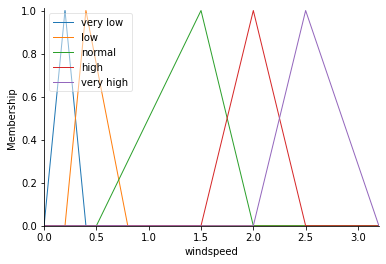

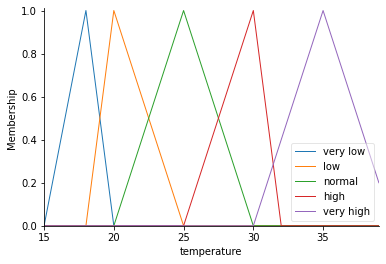

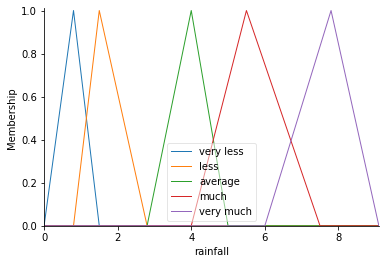

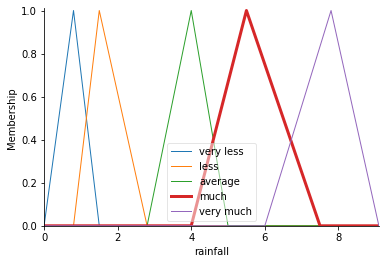

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
windspeed=ctrl.Antecedent(np.arange(0,3.3,0.1),'windspeed')
temperature=ctrl.Antecedent(np.arange(15,40,1),'temperature')
rainfall=ctrl.Antecedent(np.arange(0,9.2,0.1),'rainfall')
windspeed['very low']=fuzz.trimf(windspeed.universe,[0,0.2,0.4])
windspeed['low']=fuzz.trimf(windspeed.universe,[0.2,0.4,0.8])
windspeed['normal']=fuzz.trimf(windspeed.universe,[0.5,1.5,2])
windspeed['high']=fuzz.trimf(windspeed.universe,[1.5,2.0,2.5])
windspeed['very high']=fuzz.trimf(windspeed.universe,[2,2.5,3.2])
temperature['very low']=fuzz.trimf(temperature.universe,[15,18,20])
temperature['low']=fuzz.trimf(temperature.universe,[18,20,25])
temperature['normal']=fuzz.trimf(temperature.universe,[20,25,30])
temperature['high']=fuzz.trimf(temperature.universe,[25,30,32])
temperature['very high']=fuzz.trimf(temperature.universe,[30,35,40])
rainfall['very less']=fuzz.trimf(rainfall.universe,[0,0.8,1.5])
rainfall['less']=fuzz.trimf(rainfall.universe,[0.8,1.5,2.8])
rainfall['average']=fuzz.trimf(rainfall.universe,[2.8,4.0,5.0])
rainfall['much']=fuzz.trimf(rainfall.universe,[4.0,5.5,7.5])
rainfall['very much']=fuzz.trimf(rainfall.universe,[6.0,7.8,9.1])
windspeed.view()
temperature.view()
rainfall.view()
rainfall['much'].view()
rule1=ctrl.Rule(windspeed['very low'] & temperature['very low'],rainfall['very much'])
rule2=ctrl.Rule(windspeed['very low'] & temperature['low'],rainfall['very much'])
rule3=ctrl.Rule(windspeed['very low'] & temperature['normal'],rainfall['much'])
rule4=ctrl.Rule(windspeed['very low'] & temperature['high'],rainfall['less'])
rule5=ctrl.Rule(windspeed['very low'] & temperature['very high'],rainfall['average'])

rule6=ctrl.Rule(windspeed['low'] & temperature['very low'],rainfall['very much'])
rule7=ctrl.Rule(windspeed['low'] & temperature['low'],rainfall['very much'])
rule8=ctrl.Rule(windspeed['low'] & temperature['normal'],rainfall['average'])
rule9=ctrl.Rule(windspeed['low'] & temperature['high'],rainfall['average'])
rule10=ctrl.Rule(windspeed['low'] & temperature['very high'],rainfall['less'])

rule11=ctrl.Rule(windspeed['normal'] & temperature['very low'],rainfall['very much'])
rule12=ctrl.Rule(windspeed['normal'] & temperature['low'],rainfall['much'])
rule13=ctrl.Rule(windspeed['normal'] & temperature['normal'],rainfall['average'])
rule14=ctrl.Rule(windspeed['normal'] & temperature['high'],rainfall['less'])
rule15=ctrl.Rule(windspeed['normal'] & temperature['very high'],rainfall['less'])

rule16=ctrl.Rule(windspeed['high'] & temperature['very low'],rainfall['average'])
rule17=ctrl.Rule(windspeed['high'] & temperature['low'],rainfall['average'])
rule18=ctrl.Rule(windspeed['high'] & temperature['normal'],rainfall['less'])
rule19=ctrl.Rule(windspeed['high'] & temperature['high'],rainfall['less'])
rule20=ctrl.Rule(windspeed['high'] & temperature['very high'],rainfall['very less'])

rule21=ctrl.Rule(windspeed['very high'] & temperature['very low'],rainfall['average'])
rule22=ctrl.Rule(windspeed['very high'] & temperature['low'],rainfall['less'])
rule23=ctrl.Rule(windspeed['very high'] & temperature['normal'],rainfall['less'])
rule24=ctrl.Rule(windspeed['very high'] & temperature['high'],rainfall['very less'])
rule25=ctrl.Rule(windspeed['very high'] & temperature['very high'],rainfall['very less'])


rainfalling_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25]) #taphopcacluat
rainfalling=ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['windspeed']= 1.9
rainfalling.input['temperature']=25
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)
